# Book Recommenmdation System

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

In [1]:
#Importinf Libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


# Data
● Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
● Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
● Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# Importing Dataset

In [2]:
#Users data
users = pd.read_csv('Users.csv')
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [4]:
#Book data
books = pd.read_csv('Books.csv')
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [5]:
#Rating data
ratings = pd.read_csv('Ratings.csv')
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [6]:
# Dimension of Dataset


In [7]:
users.shape,ratings.shape,books.shape

((278858, 3), (1149780, 3), (271360, 8))

# 1) Users_dataset

In [8]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [9]:
missing_values(users)

index  Missing Values  % of Total Values Data_type
0       Age          110762              39.72   float64
1   User-ID               0               0.00     int64
2  Location               0               0.00    object

    Age have about 39% of missing values.

In [10]:
#Age distribution

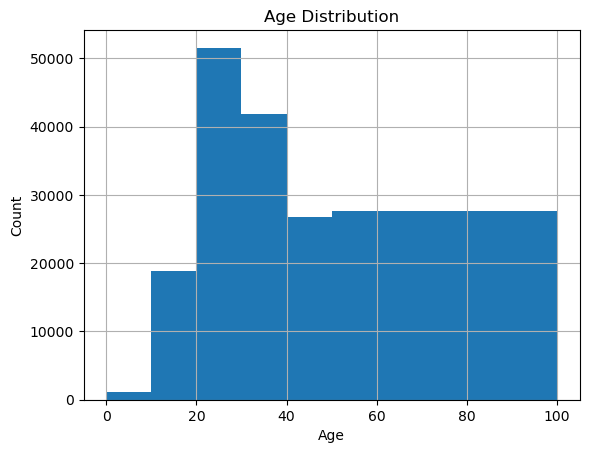

In [11]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are ampong those in their 20-40s of age

Text(0.5, 1.0, 'Find outlier data in Age column')

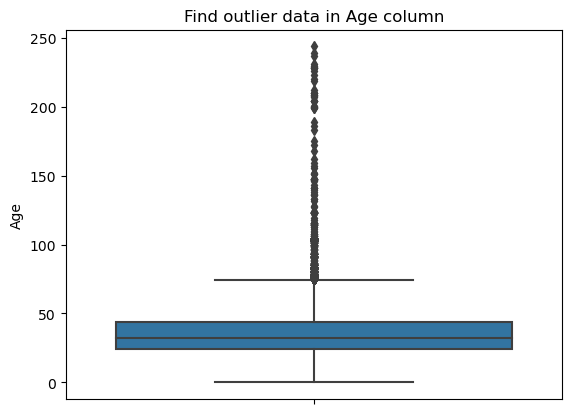

In [12]:
#Outliers detection
sns.boxplot(y = 'Age', data= users)
plt.title('Find outlier data in Age column')

In [13]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Ok we have Outlier data in Age

In [14]:
#lets find our unique value in location column

In [15]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [16]:
users.Location.nunique()

57339

57339 unique values, its really hard to understand 
so lets create column Country

In [17]:
for i in users :
    users['Country'] = users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [18]:
users.Country.nunique()

529

In [19]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [20]:
users

User-ID   Age         Country
0             1   NaN             usa
1             2  18.0             usa
2             3   NaN          russia
3             4  17.0        portugal
4             5   NaN  united kingdom
...         ...   ...             ...
278853   278854   NaN             usa
278854   278855  50.0  united kingdom
278855   278856   NaN          canada
278856   278857   NaN             usa
278857   278858   NaN         ireland

[278858 rows x 3 columns]

In [21]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [22]:
users['Country'] = users['Country'].astype('str')

In [23]:
a = list(users.Country.unique())
a =set(a)
a= list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some data has Misspellings , Lets correct it.

In [24]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

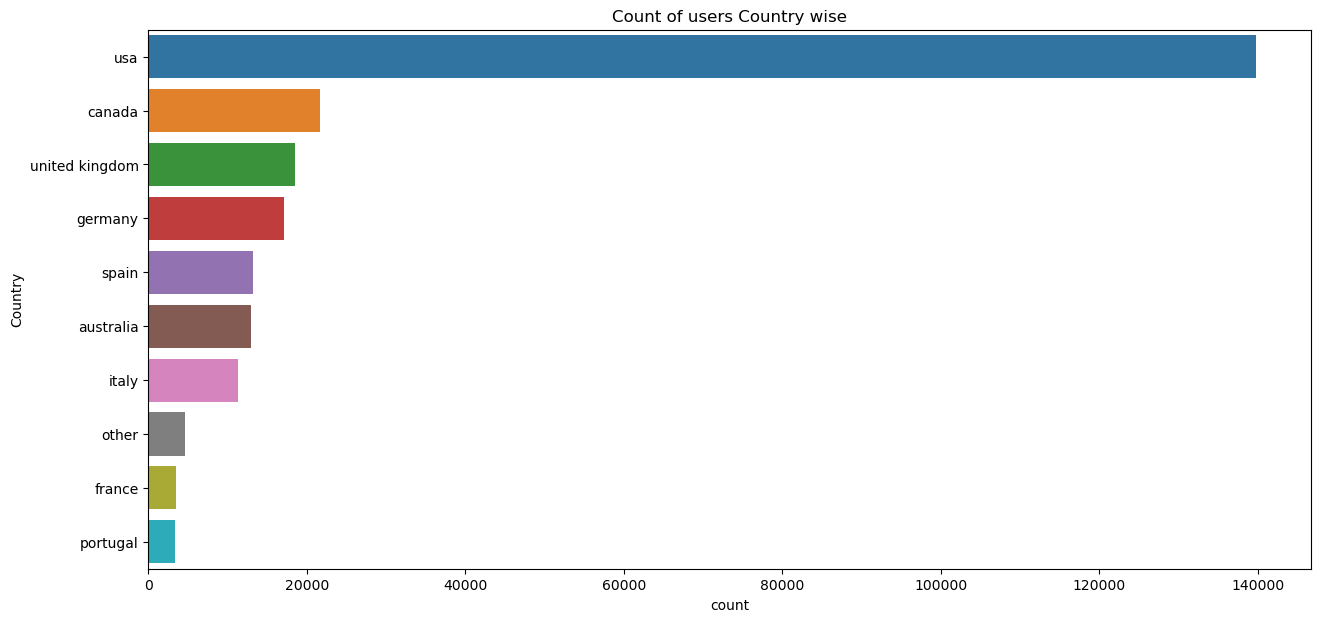

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

Most number of users are from USA

In [26]:
#Lets treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

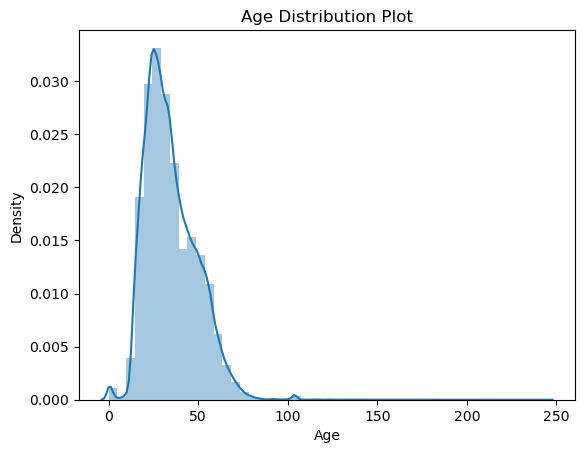

In [27]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [28]:
#Outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [29]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [30]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [31]:
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

Still we have 276 Nan values let's fill them with mean

In [32]:
users['Age'].fillna(users.Age.mean(), inplace=True)

In [33]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

# 2)Books_Dataset

In [34]:
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

In [35]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...

In [36]:
#Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Authors')

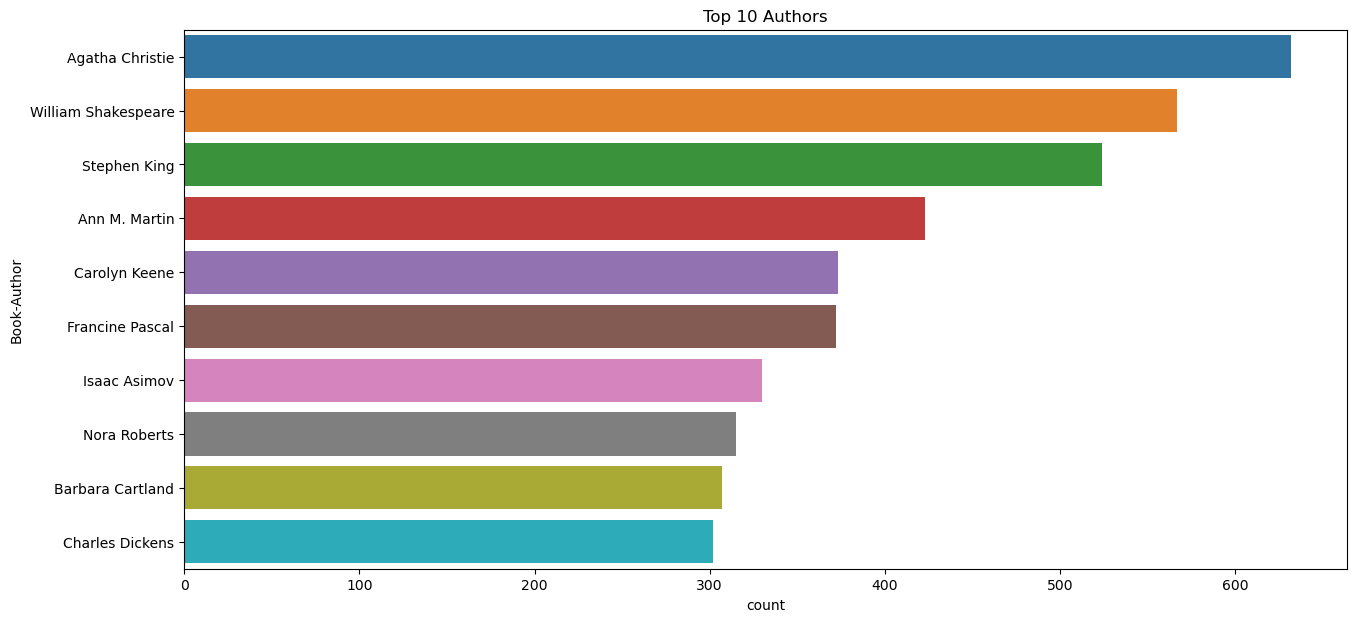

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

In [38]:
#Top 10 Publisher which have published the most books

Text(0.5, 1.0, 'Top 10 Publishers')

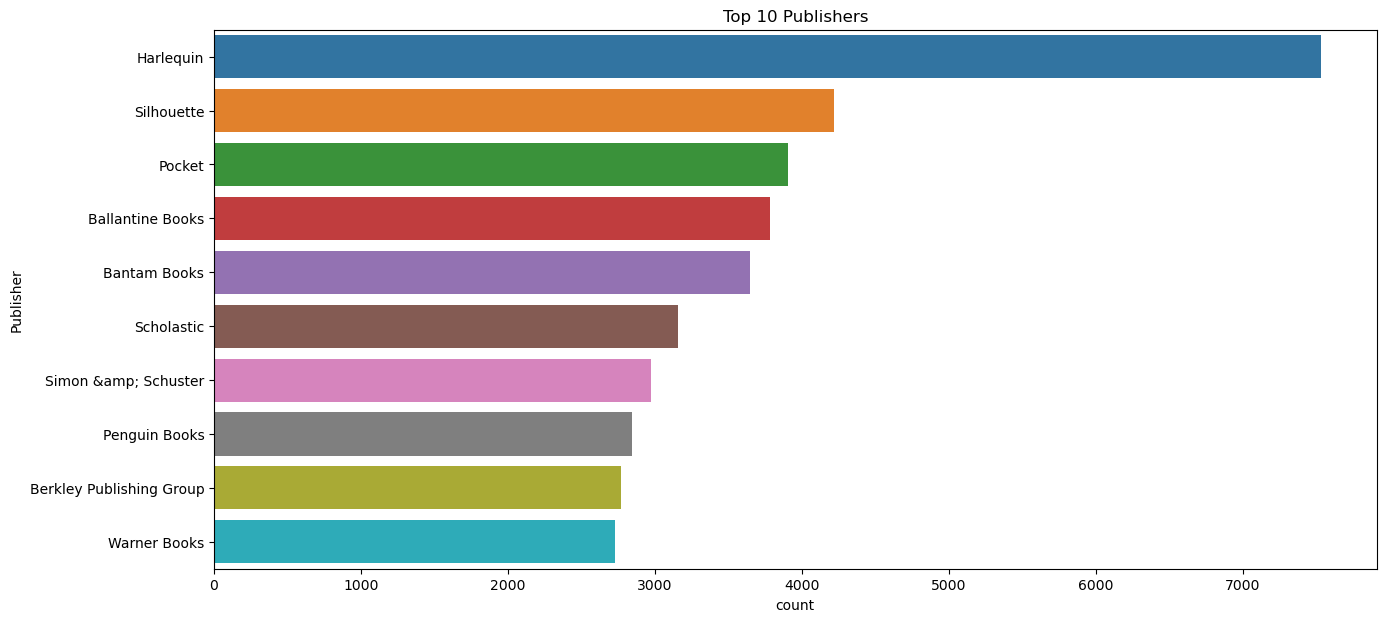

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [40]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [41]:
#investigating the rows having 'DK Publishing Inc' as year Of Publication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       Book-Author Year-Of-Publication  \
209538        2000   DK Publishing Inc   
221678        2000   DK Publishing Inc   

                                                Publisher  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [42]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [43]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [44]:
#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

               Book-Author Year-Of-Publication          Publisher  \
209538  Michael Teitelbaum                2000  DK Publishing Inc   
221678       James Buckley                2000  DK Publishing Inc   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

In [45]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

ISBN                                         Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       Book-Author Year-Of-Publication  \
220731        2003           Gallimard   

                                                Publisher  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [46]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

ISBN                             Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers   

                            Book-Author Year-Of-Publication  Publisher  \
220731  Jean-Marie Gustave Le ClÃ?Â©zio                2003  Gallimard   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [47]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [48]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [49]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [50]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [51]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]

ISBN       Book-Title      Book-Author  Year-Of-Publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae               2002.0   
129037  1931696993  Finders Keepers  Linnea Sinclair               2001.0   

       Publisher  
128890       NaN  
129037       NaN

In [52]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [53]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

ISBN                                         Book-Title  \
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author  Year-Of-Publication                       Publisher  
187689         NaN               1995.0  Edinburgh Financial Publishing

In [54]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [55]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# 3) Ratings Dataset

In [56]:
ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

Ratings dataset should have books only which exist in our books dataset

In [57]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape, ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.



In [58]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

Let's see how the ratings are distributed

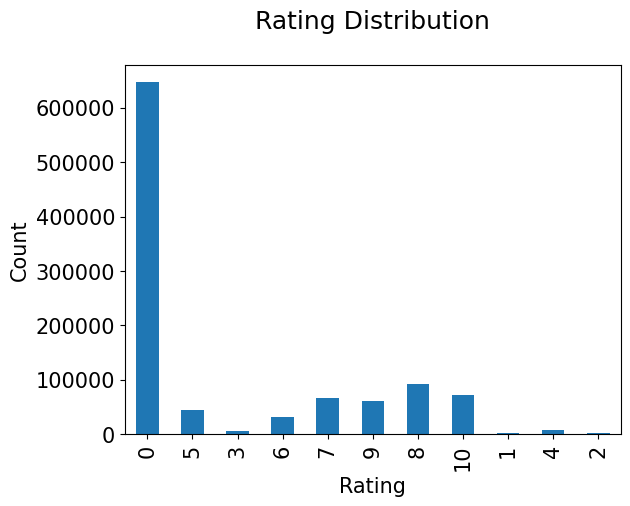

In [59]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

<Axes: xlabel='Book-Rating', ylabel='count'>

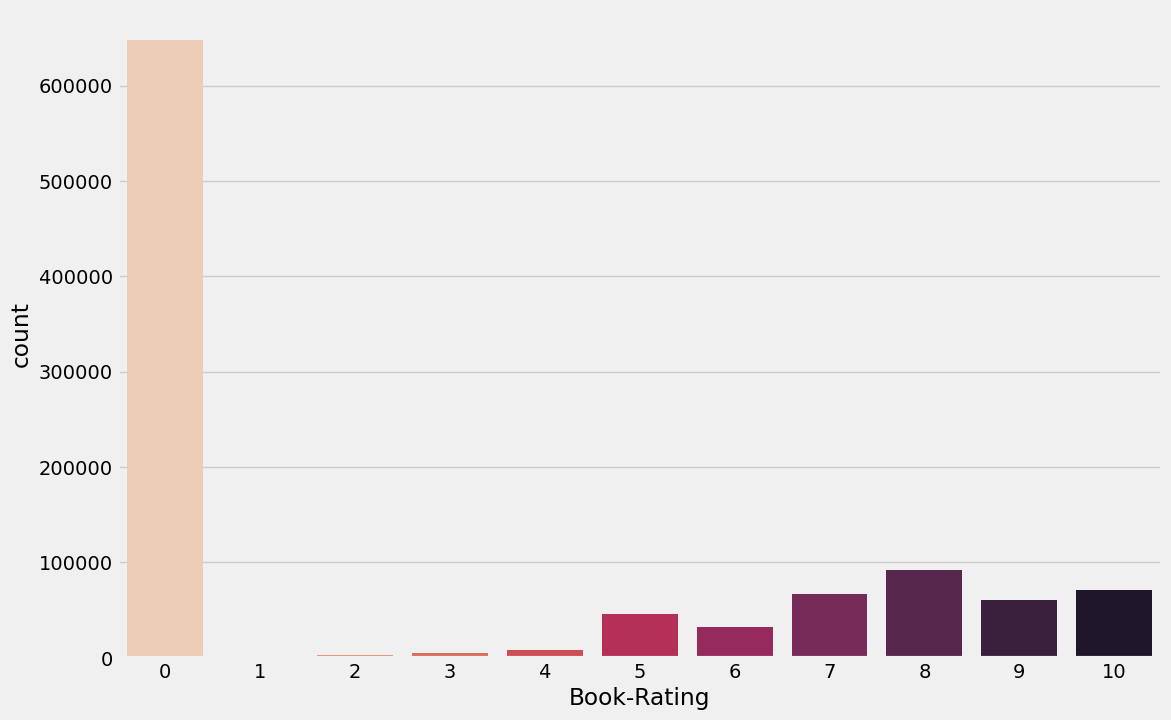

In [61]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data= ratings_new , x='Book-Rating', palette='rocket_r')

It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [62]:
#Let's find the top 5 books which are rated by most number of users.
rating_count = pd.DataFrame(ratings_new.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

Book-Rating
ISBN                   
0971880107         2502
0316666343         1295
0385504209          883
0060928336          732
0312195516          723

The book with ISBN '0316666343' received the most rating counts.

In [63]:
#Let’s find out what book it is, and what books are in the top 5.
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

ISBN                                       Book-Title    Book-Author  \
0  0316666343                        The Lovely Bones: A Novel   Alice Sebold   
1  0971880107                                      Wild Animus   Rich Shapero   
2  0385504209                                The Da Vinci Code      Dan Brown   
3  0312195516              The Red Tent (Bestselling Backlist)  Anita Diamant   
4  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   

   Year-Of-Publication      Publisher  
0               2002.0  Little, Brown  
1               2004.0        Too Far  
2               2003.0      Doubleday  
3               1998.0    Picador USA  
4               1997.0      Perennial

The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [64]:
#create column Rating Average
ratings_new ['Avg_Rating'] = ratings_new.groupby('ISBN')['Book-Rating'].transform('mean')

In [65]:
#Cearting column Rating sum
ratings_new['Total_No_Of_Users_Rated']=ratings_new.groupby('ISBN')['Book-Rating'].transform('count')

In [66]:
ratings_new

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
0         276725  034545104X            0    2.933333                       60
1         276726  0155061224            5    2.500000                        2
2         276727  0446520802            0    4.060345                      116
3         276729  052165615X            3    3.000000                        1
4         276729  0521795028            6    6.000000                        1
...          ...         ...          ...         ...                      ...
1149774   276704  0876044011            0    0.000000                        3
1149775   276704  1563526298            9    7.000000                        3
1149776   276706  0679447156            0    2.925000                       40
1149777   276709  0515107662           10    3.454545                       44
1149778   276721  0590442449           10    1.200000                       15

[1031136 rows x 5 columns]

# Merging All Dataset

In [72]:
rating_with_name = ratings_new.merge(books, on= 'ISBN')

In [73]:
rating_with_name

User-ID        ISBN  Book-Rating  Avg_Rating  \
0         276725  034545104X            0    2.933333   
1           2313  034545104X            5    2.933333   
2           6543  034545104X            0    2.933333   
3           8680  034545104X            5    2.933333   
4          10314  034545104X            9    2.933333   
...          ...         ...          ...         ...   
1031131   276688  0517145553            0    0.000000   
1031132   276688  1575660792            7    7.000000   
1031133   276690  0590907301            0    0.000000   
1031134   276704  0679752714            0    0.000000   
1031135   276704  0806917695            5    5.000000   

         Total_No_Of_Users_Rated  \
0                             60   
1                             60   
2                             60   
3                             60   
4                             60   
...                          ...   
1031131                        1   
1031132                        1   
1031133                        1   
1031134                        1   
1031135                        1   

                                                Book-Title      Book-Author  \
0                                     Flesh Tones: A Novel       M. J. Rose   
1                                     Flesh Tones: A Novel       M. J. Rose   
2                                     Flesh Tones: A Novel       M. J. Rose   
3                                     Flesh Tones: A Novel       M. J. Rose   
4                                     Flesh Tones: A Novel       M. J. Rose   
...                                                    ...              ...   
1031131                                    Mostly Harmless    Douglas Adams   
1031132                                        Gray Matter  Shirley Kennett   
1031133  Triplet Trouble and the Class Trip (Triplet Tr...     Debbie Dadey   
1031134  A Desert of Pure Feeling (Vintage Contemporaries)   Judith Freeman   
1031135  Perplexing Lateral Thinking Puzzles: Scholasti...      Paul Sloane   

         Year-Of-Publication                          Publisher  
0                     2002.0                   Ballantine Books  
1                     2002.0                   Ballantine Books  
2                     2002.0                   Ballantine Books  
3                     2002.0                   Ballantine Books  
4                     2002.0                   Ballantine Books  
...                      ...                                ...  
1031131               1995.0             Random House Value Pub  
1031132               1996.0  Kensington Publishing Corporation  
1031133               1997.0                              Apple  
1031134               1997.0                  Vintage Books USA  
1031135               1997.0                Sterling Publishing  

[1031136 rows x 9 columns]

In [75]:
x = rating_with_name.groupby('User-ID').count()['Book-Rating'] >200
y = x[x].index

In [152]:
x[254]

True

In [150]:
y

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [76]:
filtered_rating = rating_with_name[rating_with_name['User-ID'].isin(y)]

In [153]:
filtered_rating

User-ID        ISBN  Book-Rating  Avg_Rating  \
2           6543  034545104X            0    2.933333   
5          23768  034545104X            0    2.933333   
7          28523  034545104X            0    2.933333   
15         77940  034545104X            0    2.933333   
16         81977  034545104X            0    2.933333   
...          ...         ...          ...         ...   
1030883   275970  1880837927            0    0.000000   
1030884   275970  188717897X            0    0.000000   
1030885   275970  1888889047            0    0.000000   
1030886   275970  1931868123            0    0.000000   
1030887   275970  3411086211           10   10.000000   

         Total_No_Of_Users_Rated  \
2                             60   
5                             60   
7                             60   
15                            60   
16                            60   
...                          ...   
1030883                        1   
1030884                        1   
1030885                        1   
1030886                        1   
1030887                        1   

                                                Book-Title  \
2                                     Flesh Tones: A Novel   
5                                     Flesh Tones: A Novel   
7                                     Flesh Tones: A Novel   
15                                    Flesh Tones: A Novel   
16                                    Flesh Tones: A Novel   
...                                                    ...   
1030883                         The Theology of the Hammer   
1030884  The Ordeal of Integration: Progress and Resent...   
1030885  Pushcart's Complete Rotten Reviews &amp; Rejec...   
1030886  There's a Porcupine in My Outhouse: Misadventu...   
1030887                                         Die Biene.   

                           Book-Author  Year-Of-Publication  \
2                           M. J. Rose               2002.0   
5                           M. J. Rose               2002.0   
7                           M. J. Rose               2002.0   
15                          M. J. Rose               2002.0   
16                          M. J. Rose               2002.0   
...                                ...                  ...   
1030883                 Millard Fuller               1994.0   
1030884              Orlando Patterson               1998.0   
1030885                 Bill Henderson               1998.0   
1030886                   Mike Tougias               2002.0   
1030887  Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt               1993.0   

                                    Publisher  
2                            Ballantine Books  
5                            Ballantine Books  
7                            Ballantine Books  
15                           Ballantine Books  
16                           Ballantine Books  
...                                       ...  
1030883         Smyth &amp; Helwys Publishing  
1030884                Civitas Book Publisher  
1030885                        Pushcart Press  
1030886                    Capital Books (VA)  
1030887  Bibliographisches Institut, Mannheim  

[474007 rows x 9 columns]

In [79]:
y1 = filtered_rating.groupby('Book-Title').count()['Book-Rating']>= 50
famous_books = y1[y1].index

In [82]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books) ]

In [83]:
final_ratings.drop_duplicates()

User-ID        ISBN  Book-Rating  Avg_Rating  \
63        278418  0446520802            0    4.060345   
65          3363  0446520802            0    4.060345   
66          7158  0446520802           10    4.060345   
69         11676  0446520802           10    4.060345   
74         23768  0446520802            6    4.060345   
...          ...         ...          ...         ...   
1026724   266865  0531001725           10   10.000000   
1027923   269566  0670809381            0    0.000000   
1028777   271284  0440910927            0    0.000000   
1029070   271705  B0001PIOX4            0    0.000000   
1030868   275970  1586210661            9    9.000000   

         Total_No_Of_Users_Rated              Book-Title  \
63                           116            The Notebook   
65                           116            The Notebook   
66                           116            The Notebook   
69                           116            The Notebook   
74                           116            The Notebook   
...                          ...                     ...   
1026724                        1  The Catcher in the Rye   
1027923                        1                  Echoes   
1028777                        1           The Rainmaker   
1029070                        1          Fahrenheit 451   
1030868                        1  Me Talk Pretty One Day   

                   Book-Author  Year-Of-Publication                Publisher  
63             Nicholas Sparks               1996.0             Warner Books  
65             Nicholas Sparks               1996.0             Warner Books  
66             Nicholas Sparks               1996.0             Warner Books  
69             Nicholas Sparks               1996.0             Warner Books  
74             Nicholas Sparks               1996.0             Warner Books  
...                        ...                  ...                      ...  
1026724  Jerome David Salinger               1973.0   Scholastic Library Pub  
1027923           Maeve Binchy               1986.0              Penguin USA  
1028777           John Grisham               1995.0                   Island  
1029070           Ray Bradbury               1993.0     Simon &amp; Schuster  
1030868          David Sedaris               2001.0  Time Warner Audio Major  

[58586 rows x 9 columns]

In [108]:
final_ratings

User-ID        ISBN  Book-Rating  Avg_Rating  \
63        278418  0446520802            0    4.060345   
65          3363  0446520802            0    4.060345   
66          7158  0446520802           10    4.060345   
69         11676  0446520802           10    4.060345   
74         23768  0446520802            6    4.060345   
...          ...         ...          ...         ...   
1026724   266865  0531001725           10   10.000000   
1027923   269566  0670809381            0    0.000000   
1028777   271284  0440910927            0    0.000000   
1029070   271705  B0001PIOX4            0    0.000000   
1030868   275970  1586210661            9    9.000000   

         Total_No_Of_Users_Rated              Book-Title  \
63                           116            The Notebook   
65                           116            The Notebook   
66                           116            The Notebook   
69                           116            The Notebook   
74                           116            The Notebook   
...                          ...                     ...   
1026724                        1  The Catcher in the Rye   
1027923                        1                  Echoes   
1028777                        1           The Rainmaker   
1029070                        1          Fahrenheit 451   
1030868                        1  Me Talk Pretty One Day   

                   Book-Author  Year-Of-Publication                Publisher  
63             Nicholas Sparks               1996.0             Warner Books  
65             Nicholas Sparks               1996.0             Warner Books  
66             Nicholas Sparks               1996.0             Warner Books  
69             Nicholas Sparks               1996.0             Warner Books  
74             Nicholas Sparks               1996.0             Warner Books  
...                        ...                  ...                      ...  
1026724  Jerome David Salinger               1973.0   Scholastic Library Pub  
1027923           Maeve Binchy               1986.0              Penguin USA  
1028777           John Grisham               1995.0                   Island  
1029070           Ray Bradbury               1993.0     Simon &amp; Schuster  
1030868          David Sedaris               2001.0  Time Warner Audio Major  

[58586 rows x 9 columns]

In [143]:
final_ratings['User-ID'].nunique()

810

In [127]:
pt = final_ratings.pivot_table(index='User-ID',columns='ISBN',values='Book-Rating')

In [128]:
pt

ISBN     0001047973  0006177379  0020697406  002542730X  002542730x  \
User-ID                                                               
254             NaN         NaN         NaN         NaN         NaN   
2276            NaN         NaN         NaN         NaN         NaN   
2766            NaN         NaN         NaN         NaN         NaN   
2977            NaN         NaN         NaN         NaN         NaN   
3363            NaN         NaN         NaN         0.0         NaN   
...             ...         ...         ...         ...         ...   
274308          NaN         NaN         NaN         NaN         NaN   
275970          NaN         NaN         NaN         NaN         NaN   
277427          NaN         NaN         NaN        10.0         NaN   
277639          NaN         NaN         NaN         NaN         NaN   
278418          NaN         NaN         NaN         NaN         NaN   

ISBN     0060008024  0060008032  006001203X  0060086246  0060090367  \
User-ID                                                               
254             NaN         NaN         NaN         NaN         NaN   
2276            NaN         NaN         NaN         NaN         NaN   
2766            NaN         NaN         NaN         NaN         NaN   
2977            NaN         NaN         NaN         NaN         NaN   
3363            NaN         NaN         NaN         NaN         0.0   
...             ...         ...         ...         ...         ...   
274308          NaN         NaN         NaN         NaN         NaN   
275970          NaN         NaN         NaN         NaN         NaN   
277427          NaN         NaN         NaN         NaN         NaN   
277639          NaN         NaN         NaN         NaN         NaN   
278418          NaN         NaN         NaN         NaN         NaN   

ISBN     0060093102  0060094818  0060096195  0060129565  0060158638  \
User-ID                                                               
254             NaN         NaN         NaN         NaN         NaN   
2276            NaN         NaN         NaN         NaN         NaN   
2766            NaN         NaN         NaN         NaN         NaN   
2977            NaN         NaN         NaN         NaN         NaN   
3363            NaN         NaN         0.0         NaN         NaN   
...             ...         ...         ...         ...         ...   
274308          NaN         NaN         NaN         NaN         NaN   
275970          NaN         NaN         NaN         NaN         NaN   
277427          NaN         NaN         NaN         NaN         NaN   
277639          NaN         NaN         NaN         NaN         NaN   
278418          NaN         NaN         NaN         NaN         NaN   

ISBN     0060168013  006016848X  006017322X  0060175400  0060179333  \
User-ID                                                               
254             NaN         NaN         NaN         NaN         NaN   
2276            NaN         NaN         NaN         NaN         NaN   
2766            NaN         NaN         NaN         NaN         NaN   
2977            NaN         NaN         NaN         NaN         NaN   
3363            NaN         NaN         NaN         0.0         NaN   
...             ...         ...         ...         ...         ...   
274308          NaN         NaN         NaN         NaN         NaN   
275970          NaN         NaN         NaN         NaN         NaN   
277427          NaN         NaN         NaN         NaN         NaN   
277639          NaN         NaN         NaN         NaN         NaN   
278418          NaN         0.0         NaN         NaN         NaN   

ISBN     0060198133  0060199652  0060283122  0060283130  0060391626  \
User-ID                                                               
254             NaN         NaN         NaN         NaN         NaN   
2276            NaN         NaN         NaN         NaN         NaN   
2766            NaN 

In [129]:
pt.fillna(0,inplace=True)

In [130]:
pt

ISBN     0001047973  0006177379  0020697406  002542730X  002542730x  \
User-ID                                                               
254             0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
2766            0.0         0.0         0.0         0.0         0.0   
2977            0.0         0.0         0.0         0.0         0.0   
3363            0.0         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
274308          0.0         0.0         0.0         0.0         0.0   
275970          0.0         0.0         0.0         0.0         0.0   
277427          0.0         0.0         0.0        10.0         0.0   
277639          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   

ISBN     0060008024  0060008032  006001203X  0060086246  0060090367  \
User-ID                                                               
254             0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
2766            0.0         0.0         0.0         0.0         0.0   
2977            0.0         0.0         0.0         0.0         0.0   
3363            0.0         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
274308          0.0         0.0         0.0         0.0         0.0   
275970          0.0         0.0         0.0         0.0         0.0   
277427          0.0         0.0         0.0         0.0         0.0   
277639          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   

ISBN     0060093102  0060094818  0060096195  0060129565  0060158638  \
User-ID                                                               
254             0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
2766            0.0         0.0         0.0         0.0         0.0   
2977            0.0         0.0         0.0         0.0         0.0   
3363            0.0         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
274308          0.0         0.0         0.0         0.0         0.0   
275970          0.0         0.0         0.0         0.0         0.0   
277427          0.0         0.0         0.0         0.0         0.0   
277639          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   

ISBN     0060168013  006016848X  006017322X  0060175400  0060179333  \
User-ID                                                               
254             0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
2766            0.0         0.0         0.0         0.0         0.0   
2977            0.0         0.0         0.0         0.0         0.0   
3363            0.0         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
274308          0.0         0.0         0.0         0.0         0.0   
275970          0.0         0.0         0.0         0.0         0.0   
277427          0.0         0.0         0.0         0.0         0.0   
277639          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   

ISBN     0060198133  0060199652  0060283122  0060283130  0060391626  \
User-ID                                                               
254             0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
2766            0.0 

In [ ]:
#Calculate the distances and similarity

In [131]:
from sklearn.metrics import pairwise_distances

In [132]:
pd.DataFrame(pairwise_distances(pt, metric='cosine'))

0    1         2         3             4         5         6    \
0    2.220446e-16  1.0  1.000000  0.902324  1.000000e+00  1.000000  1.000000   
1    1.000000e+00  0.0  1.000000  1.000000  1.000000e+00  1.000000  0.656599   
2    1.000000e+00  1.0  0.000000  1.000000  1.000000e+00  0.861266  1.000000   
3    9.023236e-01  1.0  1.000000  0.000000  1.000000e+00  0.942921  1.000000   
4    1.000000e+00  1.0  1.000000  1.000000  2.220446e-16  0.860653  1.000000   
..            ...  ...       ...       ...           ...       ...       ...   
805  9.389702e-01  1.0  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
806  1.000000e+00  1.0  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
807  1.000000e+00  1.0  1.000000  1.000000  1.000000e+00  0.952565  1.000000   
808  1.000000e+00  1.0  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
809  1.000000e+00  1.0  0.946151  1.000000  1.000000e+00  1.000000  1.000000   

          7         8         9         10        11        12        13   \
0    0.851346  1.000000  0.939570  0.991636  0.966576  1.000000  1.000000   
1    1.000000  1.000000  1.000000  1.000000  0.978558  1.000000  1.000000   
2    1.000000  0.883382  1.000000  1.000000  0.974210  1.000000  0.903949   
3    0.912485  1.000000  1.000000  0.976725  0.936700  1.000000  1.000000   
4    1.000000  1.000000  1.000000  1.000000  0.901883  0.846663  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
805  0.936675  0.883360  1.000000  0.949101  0.915955  1.000000  1.000000   
806  1.000000  1.000000  0.944220  1.000000  0.864635  1.000000  1.000000   
807  0.925132  1.000000  0.946323  1.000000  0.941086  1.000000  0.863944   
808  1.000000  1.000000  1.000000  0.908753  1.000000  1.000000  1.000000   
809  0.909885  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

          14        15        16        17        18        19        20   \
0    0.931305  1.000000  1.000000  0.959819  0.848955  1.000000  1.000000   
1    0.902703  1.000000  1.000000  1.000000  1.000000  1.000000  0.968684   
2    0.975218  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3    1.000000  0.904357  1.000000  0.839350  1.000000  1.000000  0.926042   
4    0.905719  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
805  0.971497  0.925301  1.000000  0.957736  1.000000  0.932133  1.000000   
806  0.869928  1.000000  1.000000  0.951320  1.000000  1.000000  1.000000   
807  1.000000  0.893461  0.942607  0.968770  1.000000  1.000000  0.974913   
808  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
809  1.000000  1.000000  0.983075  0.932339  1.000000  1.000000  1.000000   

     21        22        23        24        25        26        27   28   \
0    1.0  1.000000  0.918972  1.000000  0.946891  0.829672  1.000000  1.0   
1    1.0  1.000000  0.929333  1.000000  1.000000  1.000000  0.927324  1.0   
2    1.0  0.875807  0.927497  0.975724  1.000000  1.000000  0.933945  1.0   
3    1.0  1.000000  0.962747  1.000000  0.852209  1.000000  1.000000  1.0   
4    1.0  1.000000  0.930042  1.000000  0.821826  1.000000  1.000000  1.0   
..   ...       ...       ...       ...       ...       ...       ...  ...   
805  1.0  1.000000  0.870280  0.898655  1.000000  0.920376  1.000000  1.0   
806  1.0  1.000000  0.900184  1.000000  1.000000  1.000000  1.000000  1.0   
807  1.0  1.000000  0.916914  1.000000  0.915760  1.000000  1.000000  1.0   
808  1.0  1.000000  0.952227  0.785390  1.000000  0.919708  1.000000  1.0   
809  1.0  1.000000  0.940056  1.000000  1.000000  1.000000  1.000000  1.0   

          29        30        31        32        33        34   35   36   \
0    0.950067  1.000000  1.000000  1.000000  1.000000  0.839547  1.0  1.0   
1    1.000000  0.924974  1.000000  1.000000  1.000000  1.000000  1.0  1.0   
2    0.949678  1.000000  0.905432  1.000000  0.

In [133]:
final_ratings.head(3)

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated  \
63   278418  0446520802            0    4.060345                      116   
65     3363  0446520802            0    4.060345                      116   
66     7158  0446520802           10    4.060345                      116   

      Book-Title      Book-Author  Year-Of-Publication     Publisher  
63  The Notebook  Nicholas Sparks               1996.0  Warner Books  
65  The Notebook  Nicholas Sparks               1996.0  Warner Books  
66  The Notebook  Nicholas Sparks               1996.0  Warner Books

In [134]:
sim = 1- pairwise_distances(pt, metric='cosine')
pd.DataFrame(sim)

0    1         2         3    4         5         6         7    \
0    1.000000  0.0  0.000000  0.097676  0.0  0.000000  0.000000  0.148654   
1    0.000000  1.0  0.000000  0.000000  0.0  0.000000  0.343401  0.000000   
2    0.000000  0.0  1.000000  0.000000  0.0  0.138734  0.000000  0.000000   
3    0.097676  0.0  0.000000  1.000000  0.0  0.057079  0.000000  0.087515   
4    0.000000  0.0  0.000000  0.000000  1.0  0.139347  0.000000  0.000000   
..        ...  ...       ...       ...  ...       ...       ...       ...   
805  0.061030  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.063325   
806  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
807  0.000000  0.0  0.000000  0.000000  0.0  0.047435  0.000000  0.074868   
808  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
809  0.000000  0.0  0.053849  0.000000  0.0  0.000000  0.000000  0.090115   

          8         9         10        11        12        13        14   \
0    0.000000  0.060430  0.008364  0.033424  0.000000  0.000000  0.068695   
1    0.000000  0.000000  0.000000  0.021442  0.000000  0.000000  0.097297   
2    0.116618  0.000000  0.000000  0.025790  0.000000  0.096051  0.024782   
3    0.000000  0.000000  0.023275  0.063300  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.098117  0.153337  0.000000  0.094281   
..        ...       ...       ...       ...       ...       ...       ...   
805  0.116640  0.000000  0.050899  0.084045  0.000000  0.000000  0.028503   
806  0.000000  0.055780  0.000000  0.135365  0.000000  0.000000  0.130072   
807  0.000000  0.053677  0.000000  0.058914  0.000000  0.136056  0.000000   
808  0.000000  0.000000  0.091247  0.000000  0.000000  0.000000  0.000000   
809  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          15        16        17        18        19        20   21   \
0    0.000000  0.000000  0.040181  0.151045  0.000000  0.000000  0.0   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.031316  0.0   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
3    0.095643  0.000000  0.160650  0.000000  0.000000  0.073958  0.0   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
..        ...       ...       ...       ...       ...       ...  ...   
805  0.074699  0.000000  0.042264  0.000000  0.067867  0.000000  0.0   
806  0.000000  0.000000  0.048680  0.000000  0.000000  0.000000  0.0   
807  0.106539  0.057393  0.031230  0.000000  0.000000  0.025087  0.0   
808  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
809  0.000000  0.016925  0.067661  0.000000  0.000000  0.000000  0.0   

          22        23        24        25        26        27   28   \
0    0.000000  0.081028  0.000000  0.053109  0.170328  0.000000  0.0   
1    0.000000  0.070667  0.000000  0.000000  0.000000  0.072676  0.0   
2    0.124193  0.072503  0.024276  0.000000  0.000000  0.066055  0.0   
3    0.000000  0.037253  0.000000  0.147791  0.000000  0.000000  0.0   
4    0.000000  0.069958  0.000000  0.178174  0.000000  0.000000  0.0   
..        ...       ...       ...       ...       ...       ...  ...   
805  0.000000  0.129720  0.101345  0.000000  0.079624  0.000000  0.0   
806  0.000000  0.099816  0.000000  0.000000  0.000000  0.000000  0.0   
807  0.000000  0.083086  0.000000  0.084240  0.000000  0.000000  0.0   
808  0.000000  0.047773  0.214610  0.000000  0.080292  0.000000  0.0   
809  0.000000  0.059944  0.000000  0.000000  0.000000  0.000000  0.0   

          29        30        31        32        33        34   35   36   \
0    0.049933  0.000000  0.000000  0.000000  0.000000  0.160453  0.0  0.0   
1    0.000000  0.075026  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
2    0.050322  0.000000  0.094568  0.000000  0.083103  0.000000  0.0  0.0   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
4    0.146579  0.000000  0.000000  0.000000  

In [135]:
np.fill_diagonal(sim,0)

In [136]:
similarity = pd.DataFrame(sim)
similarity

0    1         2         3    4         5         6         7    \
0    0.000000  0.0  0.000000  0.097676  0.0  0.000000  0.000000  0.148654   
1    0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.343401  0.000000   
2    0.000000  0.0  0.000000  0.000000  0.0  0.138734  0.000000  0.000000   
3    0.097676  0.0  0.000000  0.000000  0.0  0.057079  0.000000  0.087515   
4    0.000000  0.0  0.000000  0.000000  0.0  0.139347  0.000000  0.000000   
..        ...  ...       ...       ...  ...       ...       ...       ...   
805  0.061030  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.063325   
806  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
807  0.000000  0.0  0.000000  0.000000  0.0  0.047435  0.000000  0.074868   
808  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
809  0.000000  0.0  0.053849  0.000000  0.0  0.000000  0.000000  0.090115   

          8         9         10        11        12        13        14   \
0    0.000000  0.060430  0.008364  0.033424  0.000000  0.000000  0.068695   
1    0.000000  0.000000  0.000000  0.021442  0.000000  0.000000  0.097297   
2    0.116618  0.000000  0.000000  0.025790  0.000000  0.096051  0.024782   
3    0.000000  0.000000  0.023275  0.063300  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.098117  0.153337  0.000000  0.094281   
..        ...       ...       ...       ...       ...       ...       ...   
805  0.116640  0.000000  0.050899  0.084045  0.000000  0.000000  0.028503   
806  0.000000  0.055780  0.000000  0.135365  0.000000  0.000000  0.130072   
807  0.000000  0.053677  0.000000  0.058914  0.000000  0.136056  0.000000   
808  0.000000  0.000000  0.091247  0.000000  0.000000  0.000000  0.000000   
809  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          15        16        17        18        19        20   21   \
0    0.000000  0.000000  0.040181  0.151045  0.000000  0.000000  0.0   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.031316  0.0   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
3    0.095643  0.000000  0.160650  0.000000  0.000000  0.073958  0.0   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
..        ...       ...       ...       ...       ...       ...  ...   
805  0.074699  0.000000  0.042264  0.000000  0.067867  0.000000  0.0   
806  0.000000  0.000000  0.048680  0.000000  0.000000  0.000000  0.0   
807  0.106539  0.057393  0.031230  0.000000  0.000000  0.025087  0.0   
808  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
809  0.000000  0.016925  0.067661  0.000000  0.000000  0.000000  0.0   

          22        23        24        25        26        27   28   \
0    0.000000  0.081028  0.000000  0.053109  0.170328  0.000000  0.0   
1    0.000000  0.070667  0.000000  0.000000  0.000000  0.072676  0.0   
2    0.124193  0.072503  0.024276  0.000000  0.000000  0.066055  0.0   
3    0.000000  0.037253  0.000000  0.147791  0.000000  0.000000  0.0   
4    0.000000  0.069958  0.000000  0.178174  0.000000  0.000000  0.0   
..        ...       ...       ...       ...       ...       ...  ...   
805  0.000000  0.129720  0.101345  0.000000  0.079624  0.000000  0.0   
806  0.000000  0.099816  0.000000  0.000000  0.000000  0.000000  0.0   
807  0.000000  0.083086  0.000000  0.084240  0.000000  0.000000  0.0   
808  0.000000  0.047773  0.214610  0.000000  0.080292  0.000000  0.0   
809  0.000000  0.059944  0.000000  0.000000  0.000000  0.000000  0.0   

          29        30        31        32        33        34   35   36   \
0    0.049933  0.000000  0.000000  0.000000  0.000000  0.160453  0.0  0.0   
1    0.000000  0.075026  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
2    0.050322  0.000000  0.094568  0.000000  0.083103  0.000000  0.0  0.0   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
4    0.146579  0.000000  0.000000  0.000000  

In [137]:
pd.set_option('display.max_columns', None)

In [138]:
similarity

0    1         2         3    4         5         6         7    \
0    0.000000  0.0  0.000000  0.097676  0.0  0.000000  0.000000  0.148654   
1    0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.343401  0.000000   
2    0.000000  0.0  0.000000  0.000000  0.0  0.138734  0.000000  0.000000   
3    0.097676  0.0  0.000000  0.000000  0.0  0.057079  0.000000  0.087515   
4    0.000000  0.0  0.000000  0.000000  0.0  0.139347  0.000000  0.000000   
..        ...  ...       ...       ...  ...       ...       ...       ...   
805  0.061030  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.063325   
806  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
807  0.000000  0.0  0.000000  0.000000  0.0  0.047435  0.000000  0.074868   
808  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
809  0.000000  0.0  0.053849  0.000000  0.0  0.000000  0.000000  0.090115   

          8         9         10        11        12        13        14   \
0    0.000000  0.060430  0.008364  0.033424  0.000000  0.000000  0.068695   
1    0.000000  0.000000  0.000000  0.021442  0.000000  0.000000  0.097297   
2    0.116618  0.000000  0.000000  0.025790  0.000000  0.096051  0.024782   
3    0.000000  0.000000  0.023275  0.063300  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.098117  0.153337  0.000000  0.094281   
..        ...       ...       ...       ...       ...       ...       ...   
805  0.116640  0.000000  0.050899  0.084045  0.000000  0.000000  0.028503   
806  0.000000  0.055780  0.000000  0.135365  0.000000  0.000000  0.130072   
807  0.000000  0.053677  0.000000  0.058914  0.000000  0.136056  0.000000   
808  0.000000  0.000000  0.091247  0.000000  0.000000  0.000000  0.000000   
809  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          15        16        17        18        19        20   21   \
0    0.000000  0.000000  0.040181  0.151045  0.000000  0.000000  0.0   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.031316  0.0   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
3    0.095643  0.000000  0.160650  0.000000  0.000000  0.073958  0.0   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
..        ...       ...       ...       ...       ...       ...  ...   
805  0.074699  0.000000  0.042264  0.000000  0.067867  0.000000  0.0   
806  0.000000  0.000000  0.048680  0.000000  0.000000  0.000000  0.0   
807  0.106539  0.057393  0.031230  0.000000  0.000000  0.025087  0.0   
808  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
809  0.000000  0.016925  0.067661  0.000000  0.000000  0.000000  0.0   

          22        23        24        25        26        27   28   \
0    0.000000  0.081028  0.000000  0.053109  0.170328  0.000000  0.0   
1    0.000000  0.070667  0.000000  0.000000  0.000000  0.072676  0.0   
2    0.124193  0.072503  0.024276  0.000000  0.000000  0.066055  0.0   
3    0.000000  0.037253  0.000000  0.147791  0.000000  0.000000  0.0   
4    0.000000  0.069958  0.000000  0.178174  0.000000  0.000000  0.0   
..        ...       ...       ...       ...       ...       ...  ...   
805  0.000000  0.129720  0.101345  0.000000  0.079624  0.000000  0.0   
806  0.000000  0.099816  0.000000  0.000000  0.000000  0.000000  0.0   
807  0.000000  0.083086  0.000000  0.084240  0.000000  0.000000  0.0   
808  0.000000  0.047773  0.214610  0.000000  0.080292  0.000000  0.0   
809  0.000000  0.059944  0.000000  0.000000  0.000000  0.000000  0.0   

          29        30        31        32        33        34   35   36   \
0    0.049933  0.000000  0.000000  0.000000  0.000000  0.160453  0.0  0.0   
1    0.000000  0.075026  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
2    0.050322  0.000000  0.094568  0.000000  0.083103  0.000000  0.0  0.0   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
4    0.146579  0.000000  0.000000  0.000000  

In [146]:
similarity.index = final_ratings['User-ID'].unique()
similarity.columns = final_ratings['User-ID'].unique()

In [ ]:
#Find out similar users

In [147]:
similarity.idxmax()

278418    163804
3363       28204
7158      109574
11676     107453
23768      21659
           ...  
151806    172512
241198    258185
79441     172512
193560    208141
72352     190925
Length: 810, dtype: int64

In [148]:
final_ratings[(final_ratings['User-ID'] == 278418) | (final_ratings['User-ID'] == 163804)]

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated  \
63       278418  0446520802            0    4.060345                      116   
184      278418  038550120X            0    3.336957                      184   
750      278418  055356451X            0    2.623529                      170   
1112     278418  0671537458            0    1.386364                       88   
3296     278418  0786817070            0    3.559748                      159   
...         ...         ...          ...         ...                      ...   
395628   163804  0743418166            0    4.400000                       20   
396470   163804  0385302304            0    4.125000                       24   
462693   163804  0385043805            0    3.166667                        6   
523427   163804  0446353957            6    3.016949                       59   
549468   163804  0345466624            0    3.625000                        8   

                                 Book-Title         Book-Author  \
63                             The Notebook     Nicholas Sparks   
184                         A Painted House        JOHN GRISHAM   
750                              Night Sins           TAMI HOAG   
1112                      Waiting to Exhale      Terry McMillan   
3296    Artemis Fowl (Artemis Fowl, Book 1)         Eoin Colfer   
...                                     ...                 ...   
395628                          Good in Bed     Jennifer Weiner   
396470                            Outlander      DIANA GABALDON   
462693                              Rebecca   Daphne du Maurier   
523427                         Mirror Image        Sandra Brown   
549468                        Over the Edge  JONATHAN KELLERMAN   

        Year-Of-Publication         Publisher  
63                   1996.0      Warner Books  
184                  2001.0         Doubleday  
750                  1995.0            Bantam  
1112                 1995.0            Pocket  
3296                 2002.0      Miramax Kids  
...                     ...               ...  
395628               2001.0             Atria  
396470               1991.0   Delacorte Press  
462693               1948.0   Doubleday Books  
523427               1990.0      Warner Books  
549468               2004.0  Ballantine Books  

[220 rows x 9 columns]